In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 13 ##

## Rules of Probability ##

Three tickets:

R, G, B

Two draws at random without replacement

P(first draw is G) = 1 / 3

P(first two draws are GR) = 1 / 6 = (1/2) of (1/3) = (1/3) * (1/2)

RG RB GR GB BR BG

*Multiplication*

P(second draw is G) = 1 / 3 = (1/6) + (1/6)

*Addition*


In [ ]:
# P(at least one Head in 3 tosses)



In [ ]:
# P(at least one Head in 10 tosses)



In [ ]:
# Discussion Question (a)
# P(Mo and Jo both appear)


In [ ]:
# Discussion Question (b)
# P(neither Mo nor Jo appears)


## Random Sampling ##

In [2]:
united = Table.read_table('united_summer2015.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')

In [3]:
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [4]:
united.take(make_array(999, 1000, 1001))

Row,Date,Flight Number,Destination,Delay
999,6/7/15,1684,LIH,-3
1000,6/7/15,1692,EWR,7
1001,6/7/15,1699,ATL,6


In [5]:
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [6]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
719,6/5/15,1614,LAS,1
1719,6/12/15,1062,MSP,23
2719,6/19/15,255,DEN,154
3719,6/25/15,1600,IAD,53
4719,7/2/15,1038,LAS,2
5719,7/9/15,1084,SEA,10
6719,7/15/15,1973,ORD,31
7719,7/22/15,1178,PDX,58
8719,7/29/15,318,DEN,-4
9719,8/4/15,1247,SAN,39


## Large Random Samples ##

In [7]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [8]:
die.sample(10)

Face
5
3
4
1
4
1
2
1
5
1


In [9]:
roll_bins = np.arange(0.5, 6.6, 1)

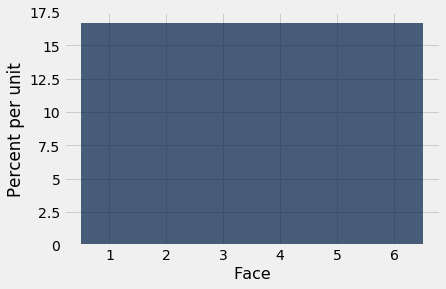

In [10]:
die.hist(bins = roll_bins)

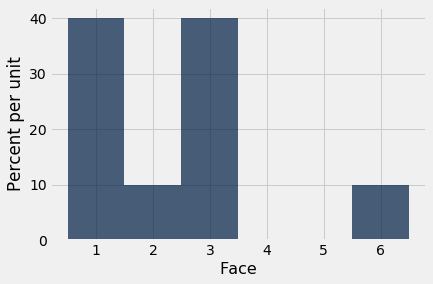

In [11]:
die.sample(10).hist(bins = roll_bins)

In [12]:
united 

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [ ]:
united.hist('Delay', bins = np.arange(-20, 201, 10))

In [13]:
min(united.column('Delay')), max(united.column('Delay'))

(-16, 580)

In [15]:
united.where('Delay', 580)

Row,Date,Flight Number,Destination,Delay
3140,6/21/15,1964,SEA,580


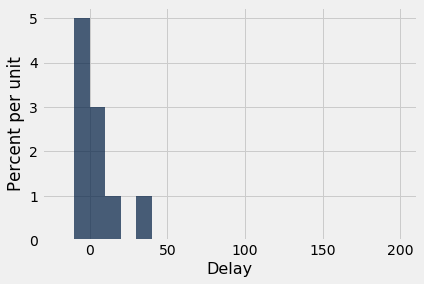

In [16]:
united.sample(10).hist('Delay', bins = np.arange(-20, 201, 10))

In [17]:
np.median(united.column('Delay'))

2.0

In [18]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

## Simulating Statistics ##

In [ ]:
np.median(united.sample(10).column('Delay'))

In [ ]:
medians = make_array()

for i in np.arange(10000):
    new_median = np.median(united.sample(1000).column('Delay'))
    medians = np.append(medians, new_median)

In [ ]:
Table().with_column('Sample Median', medians).hist(bins = np.arange(-0.5, 5.6, 1))